# Day 24 - Creating Subplots and Multiple Axes in Matplotlib

## Why Create Subplots and Multiple Axes?

Creating subplots allows you to present related visualizations together, making it easier to compare data and spot trends across different metrics. Multiple axes, on the other hand, let you plot data with different scales or units on the same graph, which is especially useful in financial analysis where you might want to compare indicators like stock price and trading volume.


## Step 1: Importing the Necessary Libraries

Let's start by importing the libraries we need.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Step 2: Creating the Basic Data for Visualization

For this tutorial, we'll create some sample data that includes financial indicators such as stock prices, trading volume, and moving averages.


In [2]:
# Creating sample data
dates = pd.date_range(start='2024-01-01', periods=100)
stock_prices = np.random.randn(100).cumsum() + 100  # Simulated stock prices
trading_volume = np.random.randint(1000, 5000, size=100)  # Simulated trading volume
moving_average = pd.Series(stock_prices).rolling(window=10).mean()  # 10-day moving average


## Step 3: Creating Subplots in a Single Figure

Now, let's create a figure with two subplots: one for stock prices and another for trading volume.


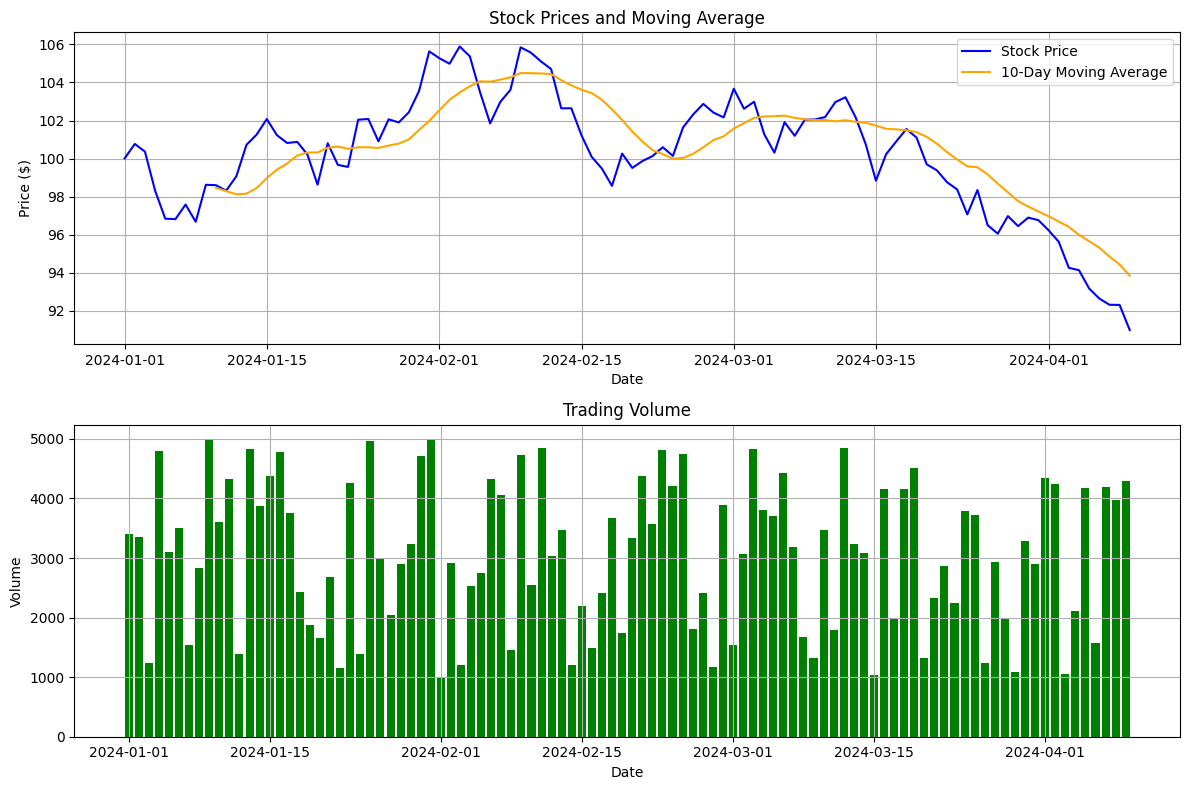

In [3]:
# Creating subplots
plt.figure(figsize=(12, 8))

# Subplot 1: Stock Prices
plt.subplot(2, 1, 1)
plt.plot(dates, stock_prices, label='Stock Price', color='blue')
plt.plot(dates, moving_average, label='10-Day Moving Average', color='orange')
plt.title('Stock Prices and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

# Subplot 2: Trading Volume
plt.subplot(2, 1, 2)
plt.bar(dates, trading_volume, color='green')
plt.title('Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)

plt.tight_layout()
plt.show()


## Step 4: Creating Multiple Axes in a Single Plot

Next, let's add multiple y-axes to a single plot to compare stock prices and trading volume on different scales.


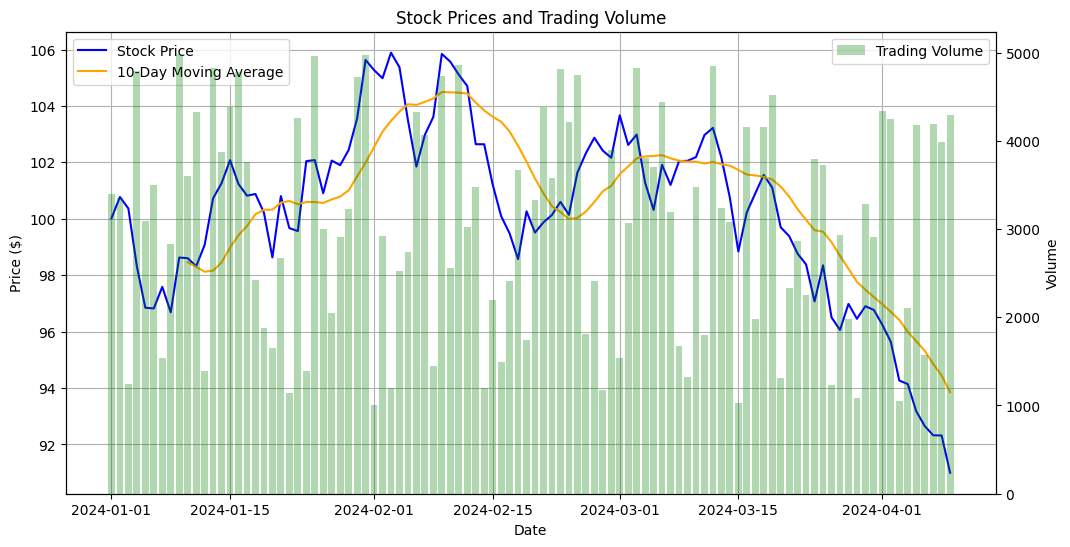

In [4]:
# Creating a plot with multiple axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting stock prices
ax1.plot(dates, stock_prices, label='Stock Price', color='blue')
ax1.plot(dates, moving_average, label='10-Day Moving Average', color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Creating a second y-axis for trading volume
ax2 = ax1.twinx()
ax2.bar(dates, trading_volume, alpha=0.3, color='green')
ax2.set_ylabel('Volume')
ax2.legend(['Trading Volume'], loc='upper right')

plt.title('Stock Prices and Trading Volume')
plt.show()


## Use Case: Comparing Different Financial Indicators

For the use case, we'll compare different financial indicators for a specific stock using subplots and multiple axes. We'll download real financial data from Yahoo Finance using the `yfinance` library and visualize indicators such as stock price, trading volume, and moving averages.


### Step 1: Downloading Financial Data

We'll use the `yfinance` library to download historical stock prices for a specific stock, such as Apple (AAPL).


In [6]:
import yfinance as yf
from datetime import date

# Downloading historical data for a specific stock (e.g., AAPL)
ticker = 'AAPL'
data = yf.download(ticker, start='2023-01-01', end=date.today())

# Calculating moving averages
data['10-Day MA'] = data['Adj Close'].rolling(window=10).mean()
data['50-Day MA'] = data['Adj Close'].rolling(window=50).mean()

# Display the first few rows of the data
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904617   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412231   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  10-Day MA  50-Day MA  
Date                                         
2023-01-03  112117500        NaN        NaN  
2023-01-04   89113600        NaN        NaN  
2023-01-05   80962700        NaN        NaN  
2023-01-06   87754700        NaN        NaN  
2023-01-09   70790800        NaN        NaN  


In [8]:
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  123.904617   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.182617   
2023-01-05  127.129997  127.769997  124.760002  125.019997  123.855087   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.412231   
2023-01-09  130.470001  133.410004  129.889999  130.149994  128.937286   

               Volume  10-Day MA  50-Day MA  
Date                                         
2023-01-03  112117500        NaN        NaN  
2023-01-04   89113600        NaN        NaN  
2023-01-05   80962700        NaN        NaN  
2023-01-06   87754700        NaN        NaN  
2023-01-09   70790800        NaN        NaN  


### Step 2: Creating Subplots for Financial Indicators

Let's visualize different financial indicators such as stock prices, trading volume, and moving averages using subplots.


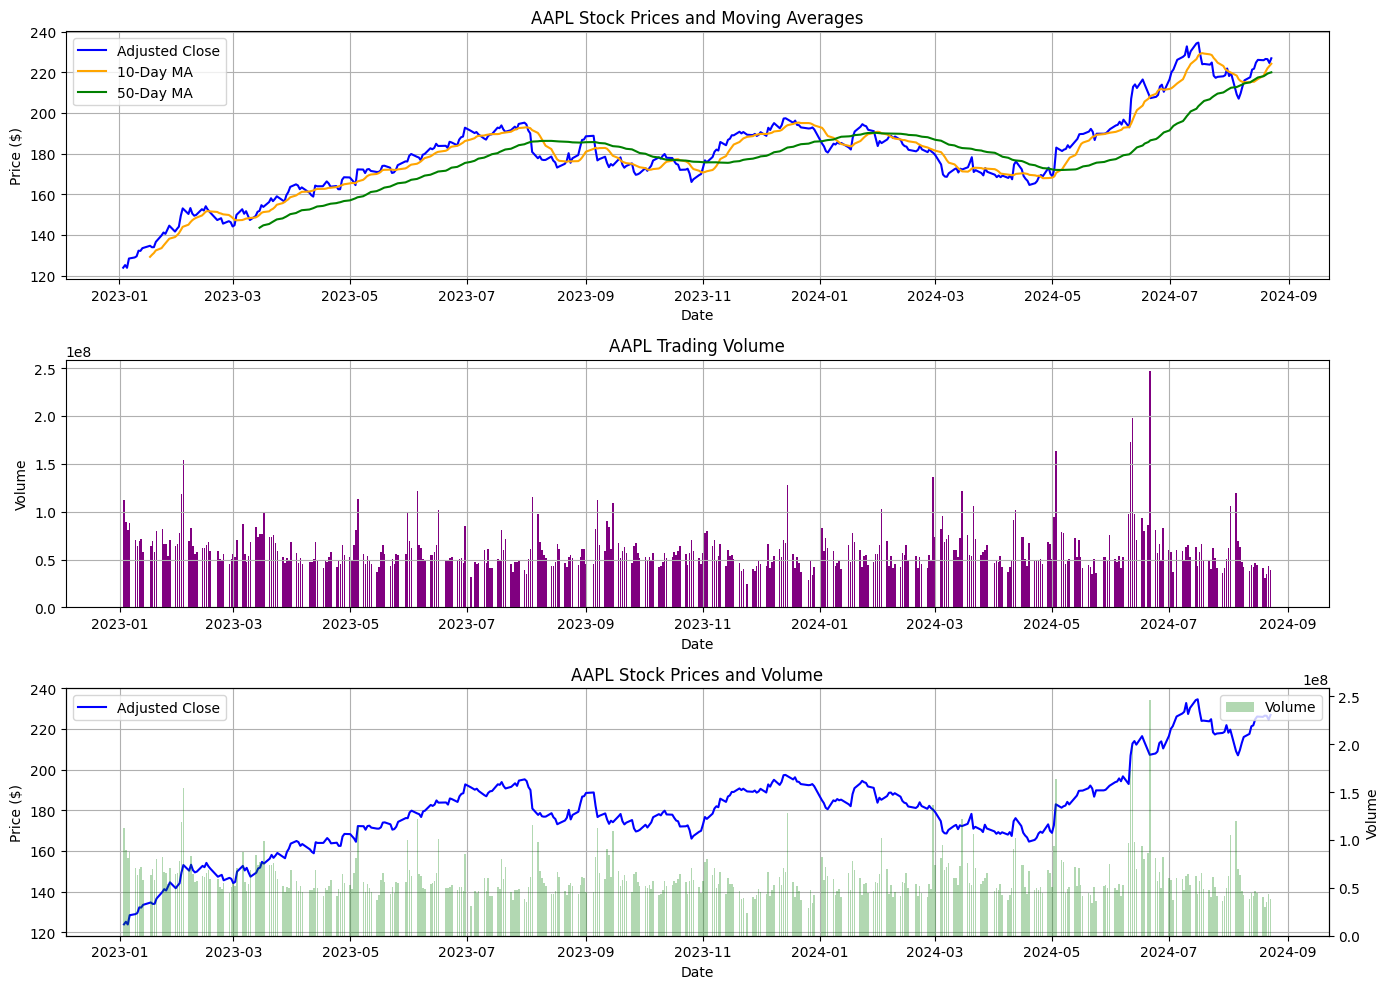

In [7]:
# Creating subplots for different financial indicators
plt.figure(figsize=(14, 10))

# Subplot 1: Stock Prices with Moving Averages
plt.subplot(3, 1, 1)
plt.plot(data.index, data['Adj Close'], label='Adjusted Close', color='blue')
plt.plot(data.index, data['10-Day MA'], label='10-Day MA', color='orange')
plt.plot(data.index, data['50-Day MA'], label='50-Day MA', color='green')
plt.title(f'{ticker} Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

# Subplot 2: Trading Volume
plt.subplot(3, 1, 2)
plt.bar(data.index, data['Volume'], color='purple')
plt.title(f'{ticker} Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)

# Subplot 3: Stock Prices and Volume with Multiple Axes
ax1 = plt.subplot(3, 1, 3)
ax1.plot(data.index, data['Adj Close'], label='Adjusted Close', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax1.legend(loc='upper left')
ax1.grid(True)

# Creating a second y-axis for trading volume
ax2 = ax1.twinx()
ax2.bar(data.index, data['Volume'], alpha=0.3, color='green')
ax2.set_ylabel('Volume')
ax2.legend(['Volume'], loc='upper right')

plt.title(f'{ticker} Stock Prices and Volume')
plt.tight_layout()
plt.show()
